<a href="https://colab.research.google.com/github/Bruno-Noriaki/Pandas-I/blob/main/Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ply
import plotly.graph_objects as go
from plotly.subplots import make_subplots as mk

In [4]:
#importação da base dados 
DF = pd.read_csv('/content/dados.csv')
DF

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [5]:
#Análise dos dados 
DF.info()
DF.describe()
#Não há nenhum dado nulo e os dados fazem sentido

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [6]:
#Aplicando tratamento de dados nulos apenas para efeitos de treinamento
DF_1 = DF.dropna(how = 'all') 
DF_1

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [7]:
#Como primeira analise, demonstrações de comparação entre Gêneros
DF_sex = DF.groupby(['Sexo']).mean().reset_index()
DF_sex
#Sabendo do contexto geral e sem conhecer o dados, é plausível supor que 1 trata-se de mulheres
#e 0 de homens, devido ao tempo de estudo maior contudo com renda menor 

,Sexo,UF,Idade,Cor,Anos de Estudo,Renda,Altura
0,0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


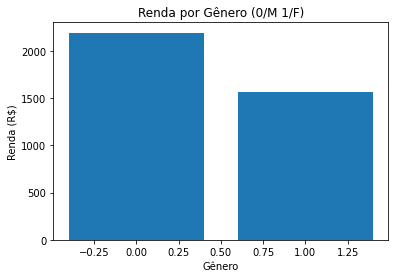

In [8]:
#Seguindo a análise, agora definida a partir de gráficos de barra a fim de comparação
fig_sex = plt.Figure(figsize = (10,10))
plt.bar(DF_sex['Sexo'],DF_sex['Renda']);
plt.xlabel('Gênero');
plt.ylabel('Renda (R$)');
plt.title('Renda por Gênero (0/M 1/F)');

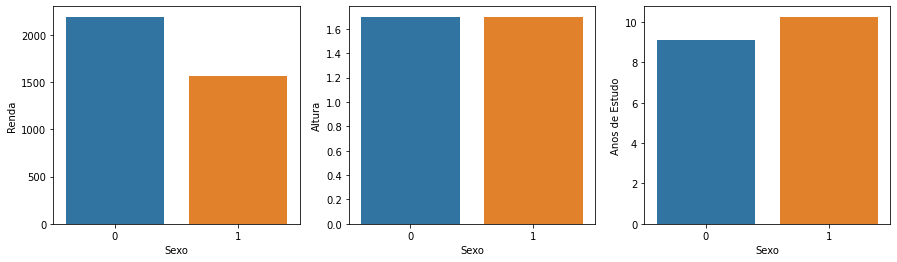

In [21]:
#Divisão dos gráficos de gênero 

fig_div, axes = plt.subplots(1,3, figsize = (15,4));

sns.barplot(data = DF_sex, x = 'Sexo', y = 'Renda', ax = axes[0]);
sns.barplot(data = DF_sex, x = 'Sexo', y = 'Altura', ax = axes[1]);
sns.barplot(data = DF_sex, x = 'Sexo', y = 'Anos de Estudo', ax = axes[2]);

In [24]:
Sex = go.Figure()
a = DF['Sexo'].value_counts(normalize=True)*100
Sex.add_trace(go.Pie(labels= DF['Sexo'],values = a))

In [10]:
#Divisão por idade

idade = DF.groupby(['Idade']).mean().reset_index()

In [11]:
idade

,Idade,UF,Sexo,Cor,Anos de Estudo,Renda,Altura
0,13,13.000000,0.000000,8.000000,6.000000,100.000000,1.606256
1,14,32.000000,0.000000,8.000000,4.000000,300.000000,1.654433
2,15,23.833333,0.500000,6.666667,6.166667,416.666667,1.666777
3,16,26.100000,0.400000,4.400000,8.200000,706.500000,1.712351
4,17,31.673469,0.224490,5.510204,9.081633,829.571429,1.702812
...,...,...,...,...,...,...,...
79,92,27.000000,0.333333,6.000000,6.000000,5000.000000,1.693428
80,94,31.000000,0.000000,2.000000,4.000000,0.000000,1.801055
81,95,12.000000,0.000000,8.000000,9.000000,500.000000,1.860137
82,97,21.000000,0.000000,0.000000,1.000000,0.000000,1.759283


In [12]:
#Para essa análise, iremos analisar o tempo de estudo, renda e altura variando com a idade
fig_idade = mk(rows = 3 , cols = 1 )

fig_idade.add_trace(go.Scatter(x = idade['Idade'], y = idade['Anos de Estudo'],
                               name = 'Anos de Estudo com base na idade'),
                               row = 1, col = 1)

fig_idade.add_trace(go.Scatter(x = idade['Idade'], y = idade['Renda'],
                               name = 'Renda com base na idade'),
                               row = 2, col = 1)

fig_idade.add_trace(go.Scatter(x = idade['Idade'], y = idade['Altura'],
                               name = 'Altura com base na idade'),
                               row = 3, col =1)

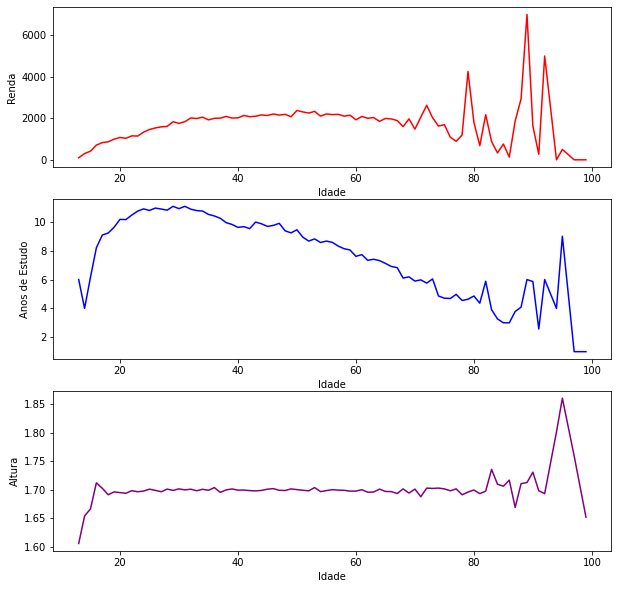

In [13]:
#Utilizando seaborn
fig_id, axes = plt.subplots(3,1, figsize =(10,10))

sns.lineplot(data = idade, x = idade['Idade'], y = idade['Renda'], ax = axes[0], color = 'Red');
sns.lineplot(data = idade, x = idade['Idade'], y = idade['Anos de Estudo'], ax = axes[1], color = 'Blue');
sns.lineplot(data = idade, x = idade['Idade'], y = idade['Altura'], ax = axes[2], color = 'Purple');